# Homework 4
Deadline: 2nd February 23:59, delivered to your tutor.





# Exercise: Understanding Independence and Correlation

## Background Information

1. **Independence of Random Variables**  
   Two random variables $X$ and $Y$ are said to be independent if the occurrence of one does not affect the probability of the other. Mathematically, this means:  
   $$
   P(X \leq x, Y \leq y) = P(X \leq x)P(Y \leq y) \quad \text{for all } x, y.
   $$
   Equivalently, their joint probability density function (pdf) or mass function can be written as the product of their marginal pdfs or mass functions:  
   $$
   f_{X,Y}(x, y) = f_X(x)f_Y(y).
   $$

2. **Correlation**  
   The correlation between two random variables $X$ and $Y$ is a measure of their linear relationship, defined as:  
   $$
   \rho(X, Y) = \frac{\text{Cov}(X, Y)}{\sqrt{\text{Var}(X)\text{Var}(Y)}}.
   $$
   Here, $\text{Cov}(X, Y)$ is the covariance of $X$ and $Y$, and $\text{Var}(X)$ and $\text{Var}(Y)$ are their variances. If $\rho(X, Y) = 0$, it means there is no linear relationship between $X$ and $Y$, but they may still be dependent.

---

## Task 1a (0.5p)

   Find a specific example of two random variables $X$ and $Y$ such that:
   - $X$ and $Y$ are dependent.
   - The correlation $\rho(X, Y)$ is equal to $0$.

Attach proof, either as markdown code, or photo.


## Task 1b (0.5p)

You are given data file `data.csv`.
- Load the data and do the pairplots of features and target, what can you observe?
- Compute the correlations and plot, the correlation matrix, what can you conclude?
- Train a random forest prediction and plot the histogram of feature importances. How does it align with previous observations?

**Write your answers clearly!**

## TASK 1a --- SOLUTION

Lets' consider the random variale $X$ defined by probability function:
$$P(X=-1)=P(X=1)=\frac{1}{4},\quad P(X=0)=\frac{1}{2}.$$
Let the random variable $Y$ be defined as $Y := X^2$. Hence,
$$P(Y=0|X=0)=P(Y=1|X=-1)=P(Y=1|X=1)=1.$$
The distribution of the varable $Y$ is defined by the probability function:
$$P(Y=0)= P(Y=0|X=0)P(X=0) = 1\cdot \frac{1}{2}=\frac{1}{2},$$
$$ P(Y=1) =P(Y =1|X =1)P(X =1) + P(Y =1|X =−1)P(X =−1) =
1\cdot\frac{1}{4} + 1\cdot\frac{1}{4} = \frac{1}{2}.$$

We can see that $X$ and $Y$ are dependent, because:
$$ P(X = 0,Y = 0) \neq  P(X = 0)P(Y = 0)$$
Where:

  - $P(X = 0,Y = 0) = \frac{1}{2}; $
  - $ P(X = 0)P(Y = 0) = \frac{1}{2}\cdot \frac{1}{2} = \frac{1}{4}.$

Let's calculate:

  - $\mathbb{E}(X) = -1\cdot\frac{1}{4} + 0\cdot \frac{1}{2} + 1\cdot\frac{1}{4}= 0;$
  - $\mathbb{E}(Y) =  0\cdot \frac{1}{2} + 1\cdot\frac{1}{2}= \frac{1}{2};$
  - $\mathbb{E}(XY) =  -1\cdot P(XY=-1) + 0 \cdot P(XY=0) + 1\cdot P(XY=1) \\
   = -1\cdot P(X=-1,Y=1) +  0 \cdot P(X=0,Y=0)+ 1\cdot P(X=1,Y=1) \\
   = -1\cdot \frac{1}{4} + 0\cdot\frac{1}{2} + 1\cdot\frac{1}{4} = 0.$

Hence, the covariance:
$$ Cov(X,Y) = \mathbb{E}(XY) - \mathbb{E}(X)\mathbb{E}(Y)=0-0\cdot\frac{1}{2} =0 .$$
The correlation between $X$ and $Y$ is equal to:
$$\rho(X,Y)= \frac{Cov(X,Y)}{\sqrt{Var(X)Var(Y)}}=\frac{0}{\sqrt{Var(X)Var(Y)}}=0.$$

QED.


## TASK 1b --- SOLUTION



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


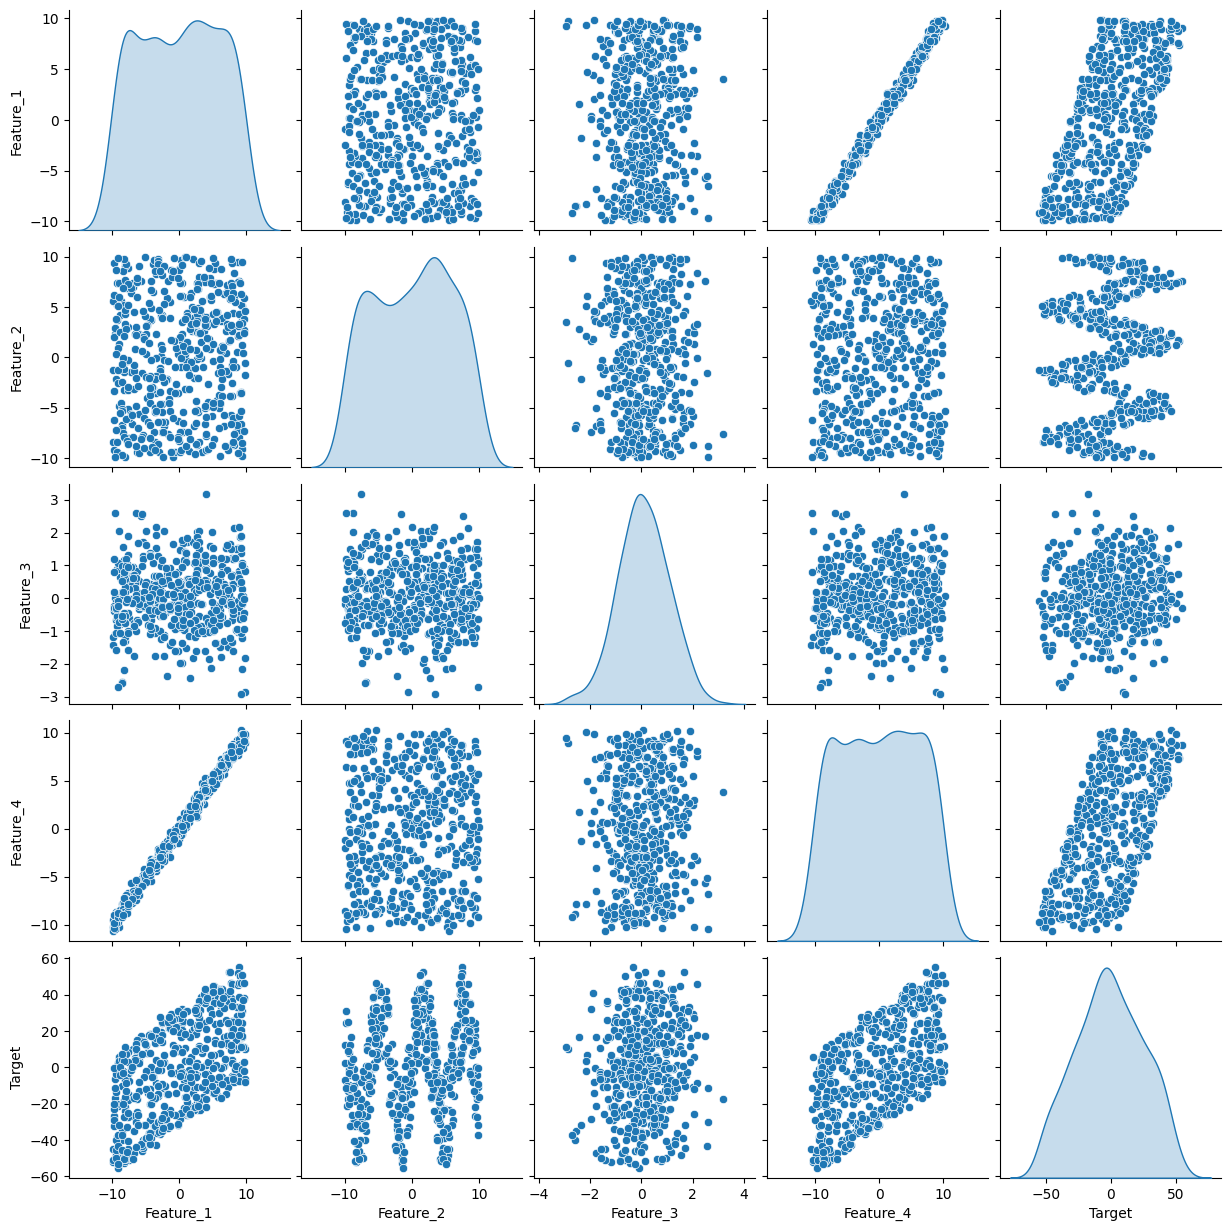

In [ ]:
# @title Features vs Target

from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/data.csv')
#print(data.describe())

import seaborn as sns

sns.pairplot(data, diag_kind='kde')
plt.show()

We can see that the points of the plots Target\~Feature1 and Target\~Feature4 form linear orders. This may indicate a linear dependency between these features and Target. What is more, these plots are very similar (almost identical), the reason for this may be the strong linear dependency between Feature1 and Feature 4. The plot fo Target\~Feature2 forms order but not linear (as a result, the Pearson's correlation between Target and Feature might be close to 0). The point cloud in the plot Target\~Feature3 is not in any order, which indicates that Feature3 and Target are independent.

Correlation matrix
           Feature_1  Feature_2  Feature_3  Feature_4    Target
Feature_1   1.000000   0.044031   0.038552   0.996672  0.600176
Feature_2   0.044031   1.000000  -0.022952   0.042055  0.179238
Feature_3   0.038552  -0.022952   1.000000   0.038521  0.111958
Feature_4   0.996672   0.042055   0.038521   1.000000  0.593566
Target      0.600176   0.179238   0.111958   0.593566  1.000000


<Axes: >

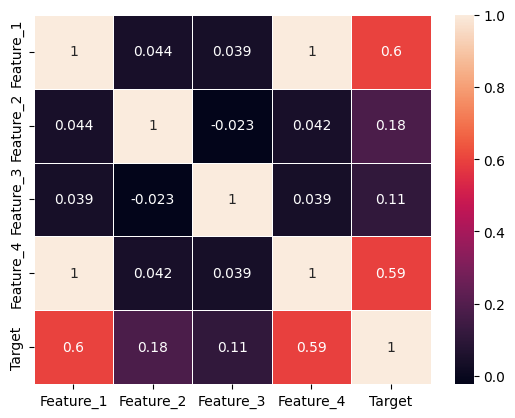

In [ ]:
# prompt: correlations of random features with target

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Print the correlation matrix
print("Correlation matrix")
print(data.corr())

sns.heatmap(data.corr(), annot=True, linewidths=.5)

Correlation matrix and heatmap show us that the Target is correlated with the Feature1 and Feauture4 the most. The target is least correlated with the Feature3. We can see also that the Target is not correlated to much with Feature2, because, as we can saw on the plot, Target is not linear depend on Feature2.

The correlations between features are low, except for the correlation between Feature1 and Feature4. It's almost equal to 1 (the variables are strongly linear dependent).

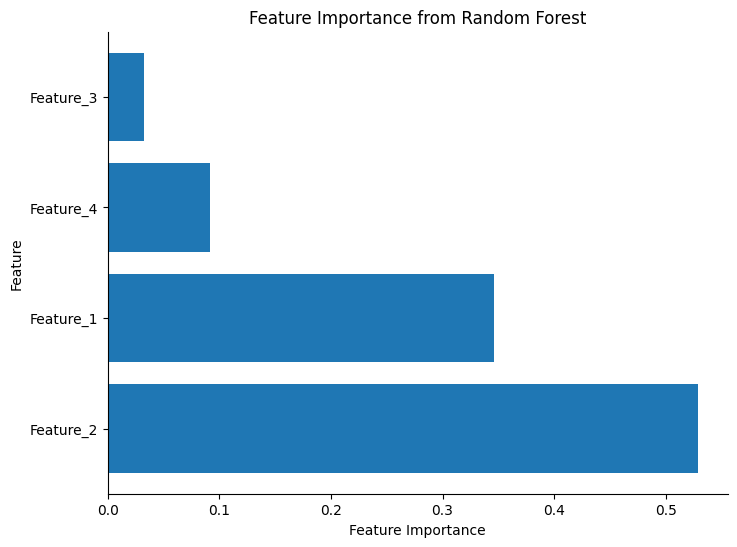

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(random_state=42)
rf.fit(data.drop("Target", axis=1), data["Target"])
importances = rf.feature_importances_

importance_df = pd.DataFrame({'Feature': data.drop("Target", axis=1).columns,
                             'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()


We can see that Feauture2 is the most important, beacase Random Forest model detected the non-linear dependency between the Target and Feature2. The second the most important feature is the Feature1, it's the first predictor in the model, and the Pearson's correlation between this feature and Target is the higher. The importance of the Feature4 is weaker, becase model detect that Feature1 and Feature4 are correlated. The Feature3 importance is the weaknest, the Target is not depends on it.

# Problem 2

Consider any dataset $X \in \mathbb{R}_n^d$, where $d$ is the number of columns, and $n$ is the number of samples. Let $\sum_{i=1}^d \mathcal{D}^2 X^i$ be the sum of variances of all the columns. Let $X_{pca} \in \mathbb{R}_n^d$ be the PCA transformed $X$ dataset. Show that $\sum_{i=1}^d \mathcal{D}^2 X^i = \sum_{i=1}^d \mathcal{D}^2 X_{pca}^i$.

Write the proof of this fact below. You can either do it in LaTeX, or you can write it in a reasonably elegant way on a piece of paper and paste an image here.

# PROBLEM 2 --- SOLUTION

We have covariance matrix $\Sigma$ for $X$ dataset, such that $cov(X^i,X^j)=\Sigma_{i,j}$. Variance of $i$-column is equal to $\Sigma_{i,i}$.

The sum of the vaariances of the features of X is given by:

$\sum_{i=1}^d D^2(X^i)=Tr(\Sigma)$


PCA transformation applies an orthogonal transformation $V$ (whose columns are the eigenvectors of $\Sigma$) to diagonalize $\Sigma$:
$$X_{pca}=XV$$

Covariance matrix of $X_{PCA}$ is diagonal matrix with variance of principal components on the diagonal:

$$\Sigma_{pca}=V^T\Sigma V$$

Since $V$ is orthogonal, we can  write following equation:

$$\Sigma_{i=1}^1 D^2X_{pca}^i =
Tr(\Sigma_{pca}) = Tr(V^T\Sigma V) = Tr(\Sigma VV^{T}) = Tr(\Sigma)= \sum_{i=1}^d D^2 X^i$$

The first equality follows from the fact that on the diagonal of the $\Sigma$ matrix are the variances of the subsequent columns, then substitute the above form of the $\Sigma$ matrix. The next equality follows from the trace property of the matrix $Tr(ABC)=Tr(BCA)$. Next, we convert $VV^T$ into an identity matrix.

QED

# **Problem 3 (1p)**

In this problem you will use algorithm from Online Learning and Boosting, called Multiplicative Weights Update https://www.cs.princeton.edu/~arora/pubs/MWsurvey.pdf to solve the following optimization problem.

## Problem Definition
- **Input**:
  - Universe $U = \{1, 2, \dots, n\}$
  - Sets $\mathcal{S} = \{S_1, \dots, S_m\},\ S_i \subseteq U$
- **Goal**: Find smallest $\mathcal{C} \subseteq \mathcal{S}$ covering $U$

## Algorithm

**Initialize weights**:
   $$
   w_u^{(1)} = 1 \quad \forall u \in U
   $$

**Repeat until all elements covered**:
1. **Choose set** $S_i$ with probability:
   $$
   \mathbb{P}[S_i] = \frac{\sum_{u \in S_i} w_u^{(t)}}{\sum_{j=1}^m \sum_{u \in S_j} w_u^{(t)}}
   $$

2. **Add** $S_i$ to solution $\mathcal{C}$

3. **Update weights** for uncovered $u \in S_i$:
   $$
   w_u^{(t+1)} = \frac{1}{2}w_u^{(t)}
   $$

## Task
1. Show that the total number of rounds (the number of sets the algorithm returns) is on expectation at most O(\log n) worse than the optimum number of sets needed:
   $$
   \mathbb{E}[T] \leq 2\text{OPT}\ln n
   $$



## TASK 3 --- SOLUTION

Let:

$$W^{(t)}:=\sum_{u\in U} w_u^{(t)}.$$
From the definitions:

  - $W^{(1)}=n,$
  - $w_u^{(t)}=(\tfrac{1}{2})^{t-1}. $

Let assume the $OPT$ is the minimum number of sets needed to cover. At each iteration, the set $S_i$ covers some subset of the elements. Then, in each iteration, the expected weight coverage by the chosen set $S_i$ is at least $\tfrac{W^{(t)}}{OPT}$ , since in the optimal solution $OPT$ of the sets it is sufficient for full coverage.

We have:
$$\mathbb{E}[W^{(t)} - W^{(t+1)}]\geq \tfrac{W^{(t)}}{2OPT},$$
What implies:
$$ W^{(t)} \leq n(1-\tfrac{1}{2OPT})^T. $$
Coverage will end when $W^{(t)}\leq 1$, so we looking for $T$, for:
$$n(1-\tfrac{1}{2OPT})^T\leq 1$$
$$\ln(n) + T\ln(1-\tfrac{1}{2OPT})\leq 0$$
$$\ln(n) \leq -T\ln(1-\tfrac{1}{2OPT})$$
Using aproximation $\ln(1-x)\approx -x$, we have:
$$\ln(n) \leq T\cdot \tfrac{1}{2OPT}$$
$$T\geq 2OPT \ln(n)$$

It means that the coverage will definitely end after at most this number of rounds in the worst case. This implies:

$$\mathbb{E} \leq 2OPT\ln(n)$$

QED